In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
trans = CPTAC.get_transcriptomics()

In [8]:
gene = "ARID1A"
protein = "ARID1A"

p_values = []

genedf = CPTAC.compare_mutations(proteomics, gene, protein)
#print(genedf)
tumordf = genedf.loc[genedf["Patient_Type"] == "Tumor"].drop("Mutation", axis = 1)
normaldf = genedf.loc[genedf["Patient_Type"] != "Tumor"].drop("Mutation", axis = 1)
print(tumordf)
print(normaldf)

ttest = scipy.stats.ttest_ind(tumordf[protein], normaldf[protein])
p_values.append(ttest[1])

print(p_values)


       ARID1A Patient_Type
S001 -0.87900        Tumor
S002 -1.41000        Tumor
S003 -1.04000        Tumor
S004  0.82700        Tumor
S005  0.38500        Tumor
S006  0.01060        Tumor
S007  0.20200        Tumor
S008  0.06220        Tumor
S009  0.73500        Tumor
S010  0.51900        Tumor
S011 -0.08670        Tumor
S012 -1.61000        Tumor
S013  0.11200        Tumor
S014 -1.54000        Tumor
S015  0.76700        Tumor
S016  0.73300        Tumor
S017  0.50400        Tumor
S018  0.19500        Tumor
S019 -0.20900        Tumor
S020 -0.03840        Tumor
S021  0.26900        Tumor
S022  0.22500        Tumor
S023  0.14900        Tumor
S024 -0.99200        Tumor
S025  0.39300        Tumor
S026 -0.11300        Tumor
S027  0.13700        Tumor
S028 -0.30200        Tumor
S029  0.03300        Tumor
S030 -1.19000        Tumor
...       ...          ...
S071  0.73900        Tumor
S072  0.16800        Tumor
S073 -1.14000        Tumor
S074  0.17400        Tumor
S075 -0.10600        Tumor
S

        ARID1A Patient_Type
S001 -0.879000        Tumor
S002 -1.410000        Tumor
S003 -1.040000        Tumor
S004  0.827000        Tumor
S005  0.385000        Tumor
S006  0.010600        Tumor
S007  0.202000        Tumor
S008  0.062200        Tumor
S009  0.735000        Tumor
S010  0.519000        Tumor
S011 -0.086700        Tumor
S012 -1.610000        Tumor
S013  0.112000        Tumor
S014 -1.540000        Tumor
S015  0.767000        Tumor
S016  0.733000        Tumor
S017  0.504000        Tumor
S018  0.195000        Tumor
S019 -0.209000        Tumor
S020 -0.038400        Tumor
S021  0.269000        Tumor
S022  0.225000        Tumor
S023  0.149000        Tumor
S024 -0.992000        Tumor
S025  0.393000        Tumor
S026 -0.113000        Tumor
S027  0.137000        Tumor
S028 -0.302000        Tumor
S029  0.033000        Tumor
S030 -1.190000        Tumor
...        ...          ...
S124 -0.288000       Normal
S125 -0.574000       Normal
S126 -0.368000       Normal
S127 -0.139000      

[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Mutation')]

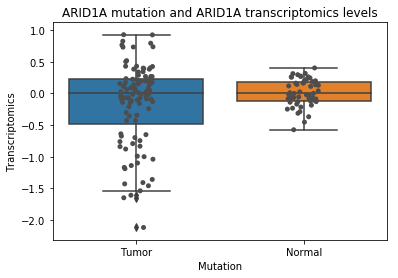

In [13]:
genedf = CPTAC.compare_mutations(proteomics, gene, protein)
genedf = genedf.drop("Mutation", axis = 1)
print (genedf)


phos_boxplot = sns.boxplot(data=genedf, x="Patient_Type",y=gene)
phos_boxplot.set_title(gene + " mutation and " + gene + " transcriptomics levels")
phos_boxplot = sns.stripplot(data=genedf, x="Patient_Type", y=gene,jitter=True, color=".3")
phos_boxplot.set(xlabel="Mutation",ylabel="Transcriptomics")